In [35]:
import eia
from collections import defaultdict
import pandas as pd
import plotly.express as px
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
import plotly.graph_objects as go

In [10]:
df_nt = pd.read_csv("Natural_Gas_consumption_by_sector2.csv")

In [11]:
df_nt

,Sector,Residential,Commercial,Industrial,Electric Power,Lease and Plant Fuel,Pipeline and Distribution Use,Vehicle Use,Total Consumption,Other
0,Jan 2014,33.46,18.44,23.30,21.38,3.90,2.78,0.10,103.36,6.78
1,Feb 2014,30.46,17.50,23.54,19.68,3.99,2.62,0.10,97.90,6.71
2,Mar 2014,22.58,13.58,21.96,18.09,4.02,2.19,0.10,82.51,6.31
3,Apr 2014,11.87,8.37,20.93,18.30,4.12,1.71,0.10,65.39,5.93
4,May 2014,6.56,5.70,19.55,20.87,4.10,1.52,0.10,58.39,5.72
...,...,...,...,...,...,...,...,...,...,...
102,Jul 2022,3.59,4.70,21.64,45.17,5.48,3.09,0.15,83.80,8.72
103,Aug 2022,3.32,4.58,21.68,44.50,5.50,3.05,0.15,82.78,8.70
104,Sep 2022,4.03,5.33,21.53,37.17,5.56,2.81,0.15,76.59,8.52
105,Oct 2022,7.94,7.61,22.26,31.04,5.56,2.84,0.15,77.40,8.55


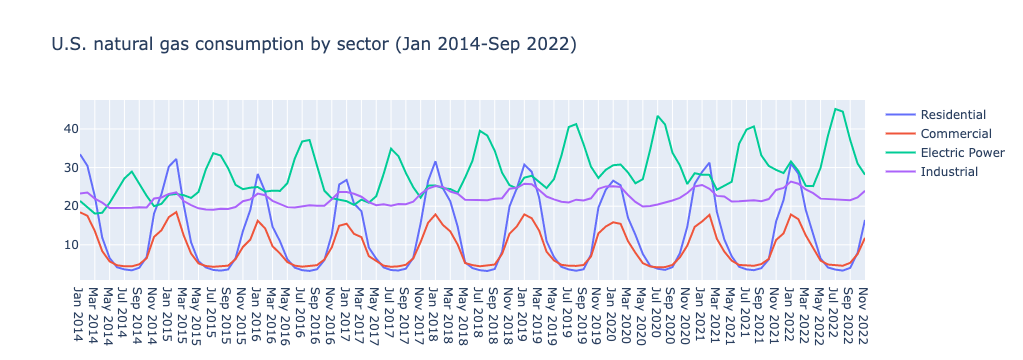

In [12]:
fig = px.line(labels=dict(x='period', y="Total Consumption in billion cubic feet per dat (Bcf/d)"),  title='U.S. natural gas consumption by sector (Jan 2014-Sep 2022)')
fig.add_scatter(x=df_nt["Sector"], y=df_nt["Residential"], mode='lines', name="Residential")
fig.add_scatter(x=df_nt["Sector"], y=df_nt["Commercial"], mode='lines', name="Commercial")
fig.add_scatter(x=df_nt["Sector"], y=df_nt["Electric Power"], mode='lines', name="Electric Power")
fig.add_scatter(x=df_nt["Sector"], y=df_nt["Industrial"], mode='lines', name="Industrial")
fig.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_nt["Industrial"], autolag = 'AIC')

print(" 2 P-Value : ", dftest[1])

 2 P-Value :  0.6835890833910094


/Users/nehamittal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



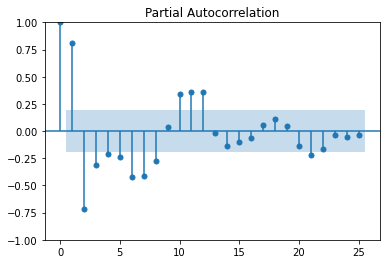

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(df_nt["Residential"], lags=25)

In [15]:
X = df_nt["Residential"]
Y = df_nt["Commercial"]
Z = df_nt["Industrial"]
W = df_nt["Electric Power"]

In [16]:
train_X = X[:len(X) - 8]
test_X = X[len(X) - 8:]
train_Y = Y[:len(Y) - 8]
test_Y = Y[len(Y) - 8:]
train_Z = Z[:len(Z) - 8]
test_Z = Z[len(Z) - 8:]
train_W = W[:len(W) - 8]
test_W = W[len(W) - 8:]

In [17]:
model_X = AutoReg(train_X, lags=25).fit()
model_Y = AutoReg(train_Y, lags=25).fit()
model_Z = AutoReg(train_Z, lags=25).fit()
model_W = AutoReg(train_W, lags=25).fit()

In [18]:
pred_X = model_X.predict(start=len(train_X), end=len(X)-1, dynamic=False)
pred_Y = model_Y.predict(start=len(train_Y), end=len(Y)-1, dynamic=False)
pred_Z = model_Z.predict(start=len(train_Z), end=len(Z)-1, dynamic=False)
pred_W = model_W.predict(start=len(train_W), end=len(W)-1, dynamic=False)

99     12.778181
100     5.991392
101     3.100320
102     3.677694
103     2.974008
104     2.939226
105     6.623040
106    14.231207
dtype: float64


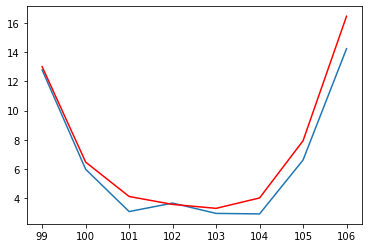

In [20]:
from matplotlib import pyplot
pyplot.plot(pred_X)
pyplot.plot(test_X, color='red')
print(pred_X)

In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_X, pred_X))

In [25]:
rmse

1.079513538992389

In [26]:
pred_res_future = model_X.predict(start=len(X)-1, end=len(X) + 12, dynamic=False)
pred_com_future = model_Y.predict(start=len(Y)-1, end=len(Y) + 12, dynamic=False)
pred_ind_future = model_Z.predict(start=len(Z)-1, end=len(Z) + 12, dynamic=False)
pred_ele_future = model_W.predict(start=len(W)-1, end=len(W) + 12, dynamic=False)

In [27]:
df_nt["res_pred"] = np.nan
df_nt["com_pred"] = np.nan
df_nt["ind_pred"] = np.nan
df_nt["ele_pred"] = np.nan

In [28]:
df_nt.head()

,Sector,Residential,Commercial,Industrial,Electric Power,Lease and Plant Fuel,Pipeline and Distribution Use,Vehicle Use,Total Consumption,Other,res_pred,com_pred,ind_pred,ele_pred
0,Jan 2014,33.46,18.44,23.30,21.38,3.90,2.78,0.1,103.36,6.78,NaN,NaN,NaN,NaN
1,Feb 2014,30.46,17.50,23.54,19.68,3.99,2.62,0.1,97.90,6.71,NaN,NaN,NaN,NaN
2,Mar 2014,22.58,13.58,21.96,18.09,4.02,2.19,0.1,82.51,6.31,NaN,NaN,NaN,NaN
3,Apr 2014,11.87,8.37,20.93,18.30,4.12,1.71,0.1,65.39,5.93,NaN,NaN,NaN,NaN
4,May 2014,6.56,5.70,19.55,20.87,4.10,1.52,0.1,58.39,5.72,NaN,NaN,NaN,NaN


In [29]:
df2_res_pred = pd.DataFrame({'Sector': ['Nov 2022', 'Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023', 'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023' ,'Nov 2023', 'Dec 2023'], 
                            'res_pred': pred_res_future,
                            'com_pred': pred_com_future,
                            'ind_pred': pred_ind_future,
                            'ele_pred': pred_ele_future})

In [30]:
df2_res_pred.head()

,Sector,res_pred,com_pred,ind_pred,ele_pred
106,Nov 2022,14.231207,9.833376,24.129826,29.727759
107,Dec 2022,24.607326,14.762480,26.051841,30.480435
108,Jan 2023,29.761716,17.177333,26.750192,31.097524
109,Feb 2023,27.131297,16.205380,26.015824,29.592489
110,Mar 2023,19.833840,12.539459,24.312438,24.914065


In [31]:
df3 = pd.concat([df_nt, df2_res_pred], ignore_index=True)

In [32]:
df3

,Sector,Residential,Commercial,Industrial,Electric Power,Lease and Plant Fuel,Pipeline and Distribution Use,Vehicle Use,Total Consumption,Other,res_pred,com_pred,ind_pred,ele_pred
0,Jan 2014,33.46,18.44,23.30,21.38,3.90,2.78,0.1,103.36,6.78,NaN,NaN,NaN,NaN
1,Feb 2014,30.46,17.50,23.54,19.68,3.99,2.62,0.1,97.90,6.71,NaN,NaN,NaN,NaN
2,Mar 2014,22.58,13.58,21.96,18.09,4.02,2.19,0.1,82.51,6.31,NaN,NaN,NaN,NaN
3,Apr 2014,11.87,8.37,20.93,18.30,4.12,1.71,0.1,65.39,5.93,NaN,NaN,NaN,NaN
4,May 2014,6.56,5.70,19.55,20.87,4.10,1.52,0.1,58.39,5.72,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,Aug 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.503326,4.130741,20.400352,41.142528
117,Sep 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.051593,4.661154,20.900988,34.991508
118,Oct 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.698139,6.338357,22.392623,30.749663
119,Nov 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.929176,10.031411,24.450642,29.507892


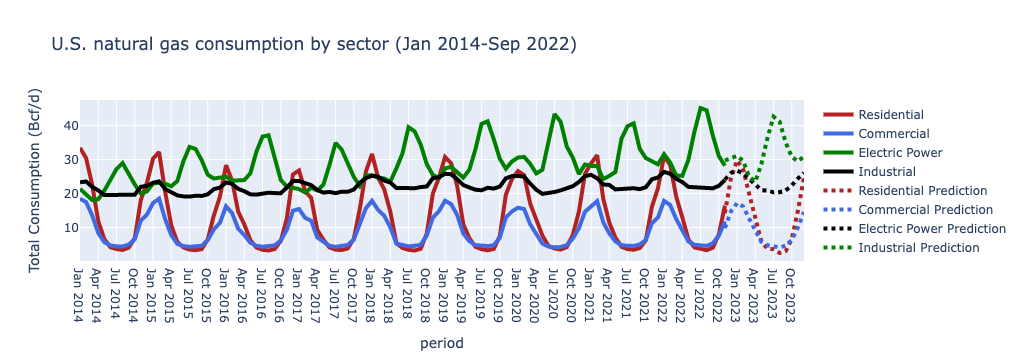

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df3["Sector"], y=df3["Residential"], name="Residential",
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=df3["Sector"], y=df3["Commercial"], name="Commercial",
                         line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x=df3["Sector"], y=df3["Electric Power"], name="Electric Power",
                         line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x=df3["Sector"], y=df3["Industrial"], name="Industrial",
                         line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x=df3["Sector"], y=df3["res_pred"],name="Residential Prediction",
                         line=dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=df3["Sector"], y=df3["com_pred"], name="Commercial Prediction",
                         line=dict(color='royalblue', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=df3["Sector"], y=df3["ind_pred"], name="Electric Power Prediction",
                         line=dict(color='black', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=df3["Sector"], y=df3["ele_pred"],name="Industrial Prediction",
                         line=dict(color='green', width=4, dash='dot')))
fig.update_layout(title='U.S. natural gas consumption by sector (Jan 2014-Sep 2022)',
                   xaxis_title='period',
                   yaxis_title="Total Consumption (Bcf/d)")
fig.show()